# Influnece of method


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.style
plt.style.use('fivethirtyeight')
import tikzplotlib

## Daten Einlesen


In [17]:
dfref500rpm = pd.read_excel('data/Dicke500rpm_refl.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dfref750rpm = pd.read_excel('data/Dicke750rpm_refl.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dfref1000rpm = pd.read_excel('data/Dicke1000rpm_refl.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dfref2000rpm = pd.read_excel('data/Dicke2000rpm_refl.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dfref3000rpm = pd.read_excel('data/Dicke3000rpm_refl.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dfref4000rpm = pd.read_excel('data/Dicke4000rpm_refl.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dfref5000rpm = pd.read_excel('data/Dicke5000rpm_refl.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dfref6000rpm = pd.read_excel('data/Dicke6000rpm_refl.xls',header = None, names = ['Nr.', 'd', 'xfit'])

dftrans500rpm =  pd.read_excel('data/Dicke500rpm_trans.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dftrans750rpm =  pd.read_excel('data/Dicke750rpm_trans.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dftrans1000rpm = pd.read_excel('data/Dicke1000rpm_trans.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dftrans2000rpm = pd.read_excel('data/Dicke2000rpm_trans.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dftrans3000rpm = pd.read_excel('data/Dicke3000rpm_trans.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dftrans4000rpm = pd.read_excel('data/Dicke4000rpm_trans.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dftrans5000rpm = pd.read_excel('data/Dicke5000rpm_trans.xls',header = None, names = ['Nr.', 'd', 'xfit'])
dftrans6000rpm = pd.read_excel('data/Dicke6000rpm_trans.xls',header = None, names = ['Nr.', 'd', 'xfit'])

dfspec_ref500rpm = pd.read_csv('data/messmethode/Reflektion/500rpm_refl_1.xy', delimiter=',', header = None, names=['nm', 'ref'])
dfspec_ref2000rpm = pd.read_csv('data/messmethode/Reflektion/2000rpm_refl_1.xy', delimiter=',', header = None, names=['nm', 'ref'])
dfspec_ref5000rpm = pd.read_csv('data/messmethode/Reflektion/5000rpm_refl_1.xy', delimiter=',', header = None, names=['nm', 'ref'])
dfspec_trans500rpm = pd.read_csv('data/messmethode/Transmission/500rpm_trans_1.xy', delimiter=',', header = None, names=['nm', 'ref'])
dfspec_trans2000rpm = pd.read_csv('data/messmethode/Transmission/2000rpm_trans_1.xy', delimiter=',', header = None, names=['nm', 'ref'])
dfspec_trans5000rpm = pd.read_csv('data/messmethode/Transmission/5000rpm_trans_1.xy', delimiter=',', header = None, names=['nm', 'ref'])

## Funktionen


In [4]:
def mittelwert(df):
    return np.array([np.mean(df.loc[:,'d']), np.std(df.loc[:,'d']), np.mean(df.loc[:,'d'])/ np.std(df.loc[:,'d'])])



In [5]:
heterogeneity_ref = mittelwert(dfref500rpm)
for i in [dfref750rpm ,dfref1000rpm,dfref2000rpm,dfref3000rpm,dfref4000rpm,dfref5000rpm,dfref6000rpm]:
    heterogeneity_ref = np.vstack((heterogeneity_ref, mittelwert(i)))

heterogeneity_trans = mittelwert(dftrans500rpm)
for i in [dftrans750rpm ,dftrans1000rpm,dftrans2000rpm,dftrans3000rpm,dftrans4000rpm,dftrans5000rpm,dftrans6000rpm]:
    heterogeneity_trans = np.vstack((heterogeneity_trans, mittelwert(i)))

In [6]:
heterogeneity_ref = np.hstack((np.array([[500,750,1000,2000,3000,4000,5000,6000]]).T, heterogeneity_ref))
heterogeneity_trans = np.hstack((np.array([[500,750,1000,2000,3000,4000,5000,6000]]).T, heterogeneity_trans))

## Plot Heterogenity


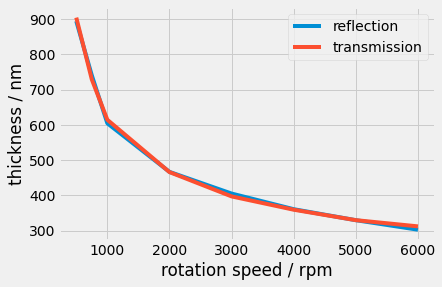

In [7]:
plt.plot(heterogeneity_ref[:,0],heterogeneity_ref[:,1], label  = 'reflection')
plt.plot(heterogeneity_trans[:,0],heterogeneity_trans[:,1], label = 'transmission')

plt.xlabel('rotation speed / rpm')
plt.ylabel('thickness / nm')
plt.legend()

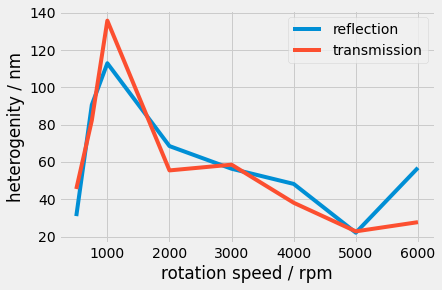

In [8]:
plt.plot(heterogeneity_ref[:,0],heterogeneity_ref[:,3], label  = 'reflection')
plt.plot(heterogeneity_trans[:,0],heterogeneity_trans[:,3], label = 'transmission')

plt.xlabel('rotation speed / rpm')
plt.ylabel('heterogenity / nm')

plt.legend()


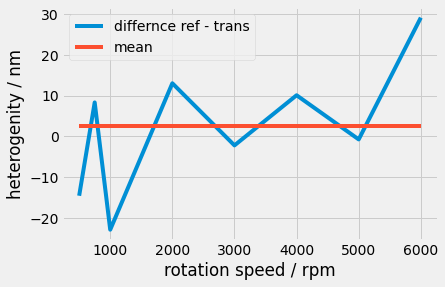

In [9]:
plt.plot(heterogeneity_ref[:,0],heterogeneity_ref[:,3]- heterogeneity_trans[:,3], label  = 'differnce ref - trans')
plt.plot(heterogeneity_ref[:,0],np.ones(heterogeneity_ref[:,0].size) *np.mean(heterogeneity_ref[:,3]- heterogeneity_trans[:,3]), label  = 'mean')

plt.xlabel('rotation speed / rpm')
plt.ylabel('heterogenity / nm')

plt.legend()


## Plots Spectra

### Reflection

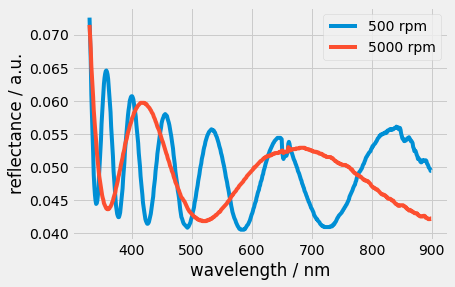

In [31]:
plt.plot(dfspec_ref500rpm.loc[:,'nm'], dfspec_ref500rpm.loc[:,'ref'], label  = '500 rpm')
#plt.plot(dfspec_ref2000rpm.loc[:,'nm'], dfspec_ref2000rpm.loc[:,'ref'], label  = '2000 rpm')
plt.plot(dfspec_ref5000rpm.loc[:,'nm'], dfspec_ref5000rpm.loc[:,'ref'], label  = '5000 rpm')

plt.xlabel('wavelength / nm')
plt.ylabel('reflectance / a.u.')
plt.legend()

tikzplotlib.save("VglMessmeth_refl_500adn5000.tex")

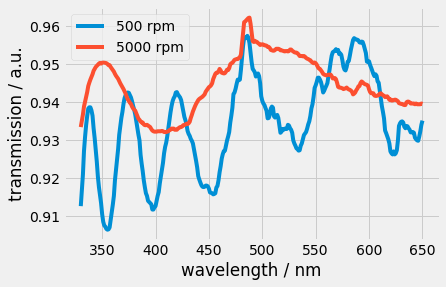

In [32]:
plt.plot(dfspec_trans500rpm.loc[:,'nm'], dfspec_trans500rpm.loc[:,'ref'], label  = '500 rpm')
#plt.plot(dfspec_ref2000rpm.loc[:,'nm'], dfspec_ref2000rpm.loc[:,'ref'], label  = '2000 rpm')
plt.plot(dfspec_trans5000rpm.loc[:,'nm'], dfspec_trans5000rpm.loc[:,'ref'], label  = '5000 rpm')

plt.xlabel('wavelength / nm')
plt.ylabel('transmission / a.u.')
plt.legend()
tikzplotlib.save("VglMessmeth_trans_500adn5000.tex")